In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITAmin/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITAmin/Titanic/test.csv')
gender_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BITAmin/Titanic/gender_submission.csv')

## train.csv

|순번|변수|설명|
|---|---|---|
|1|PassengerId|승객 아이디|
|2|lSurvived|0 = 사망, 1 = 생존|
|3|Pclass|1 = 1등석, 2 = 2등석, 3 = 3등석|
|4|Sex|male = 남성, female = 여성|
|5|Age|나이|
|6|SibSp|타이타닉 호에 동승한 자매 / 배우자의 수|
|7|Parch|타이타닉 호에 동승한 부모 / 자식의 수|
|8|Fare|승객 요금|
|9|Cabin|방 호수|
|10|Embarked|탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴|

In [ ]:
train
# 학습 데이터의 개수 891개 --> 많은 편은 아님, 분석하기에 좋은 데이터셋이라고 볼 수 없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.info()
# Dtype가 string인 열의 데이터들을 학습에 용이하게 형변환해주는 것이 좋아보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isnull().sum()
# PassengerId는 그저 승객을 분류하는 숫자이므로 고려하지 않아도 된다고 생각함
# 891행 중에서 Cabin 열은 687개의 행에서 결측치가 존재하므로 이 열을 삭제하는 것을 고려한다.
# Embarked 열은 결측치를 2개 소량으로 가지기 때문에 최빈값으로 대체해주는 것을 고려한다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def nan_prop(data):
    for col in data.columns:
        is_null_sum = data[col].isnull().sum()
        col_total_row = data[col].shape[0]
        is_null_prop = is_null_sum / col_total_row * 100
        print(f'{col} Percent of NaN value: {is_null_prop}')

nan_prop(train)

PassengerId Percent of NaN value: 0.0
Survived Percent of NaN value: 0.0
Pclass Percent of NaN value: 0.0
Name Percent of NaN value: 0.0
Sex Percent of NaN value: 0.0
Age Percent of NaN value: 19.865319865319865
SibSp Percent of NaN value: 0.0
Parch Percent of NaN value: 0.0
Ticket Percent of NaN value: 0.0
Fare Percent of NaN value: 0.0
Cabin Percent of NaN value: 77.10437710437711
Embarked Percent of NaN value: 0.22446689113355783


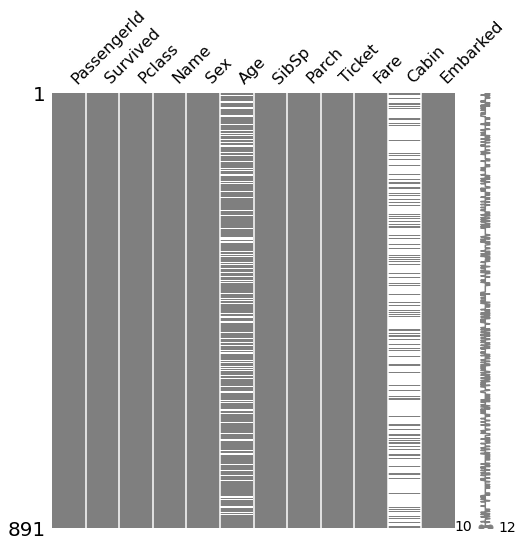

In [ ]:
# msno.matrix : 매트릭스 형태로 결측치 시각화
# train 결측치 시각화
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))

In [ ]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

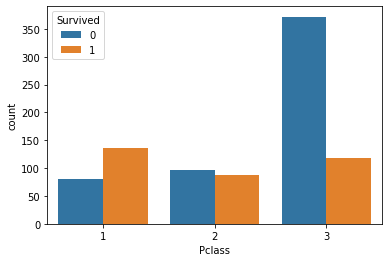

In [ ]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

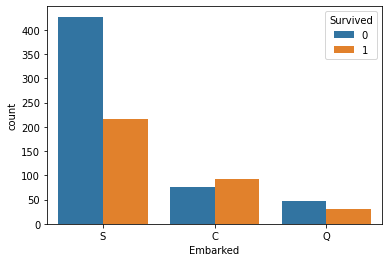

In [ ]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

male      577
female    314
Name: Sex, dtype: int64


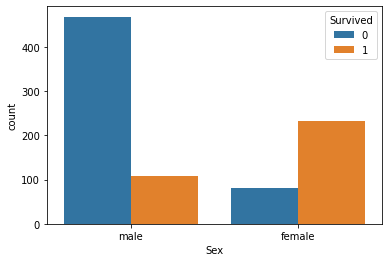

In [ ]:
print(train['Sex'].value_counts())
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

# 여성 인원수가 적음에도 여성 생존자가 많음

In [ ]:
def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', stacked=True)  

3    491
1    216
2    184
Name: Pclass, dtype: int64


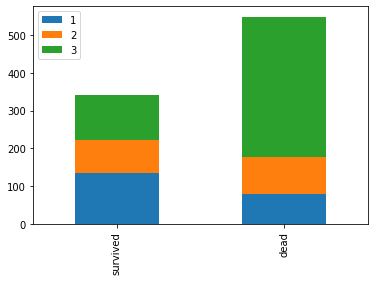

In [ ]:
print(train['Pclass'].value_counts())
chart(train, 'Pclass')
# 3등석이 가장 많이 죽은 것을 알 수 있음

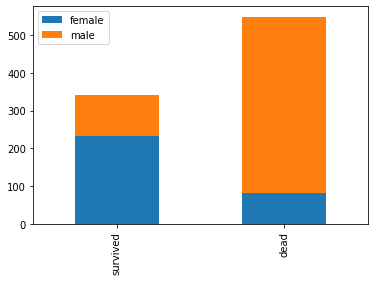

In [ ]:
chart(train, 'Sex')
# 여성의 생존률이 더 높은 것을 알 수 있음

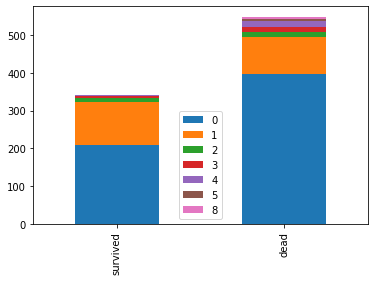

In [ ]:
chart(train, 'SibSp')

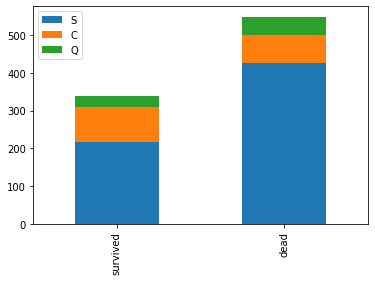

In [ ]:
chart(train, 'Embarked')

In [ ]:
union = pd.concat([train.drop('Survived', axis = 1), test], axis = 0)

whole = [train, test, union]

In [ ]:
# 1. Sex의 자료형은 문자열 자료형이므로 숫자로 변환하기
sex_mapping = {'male' : 0, 'female' : 1}
for dataset in whole:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [ ]:
# 2. Name의 자료형은 문자열 자료형이므로 호칭을 추출하고, 이를 숫자로 매핑하기 
for dataset in whole:
    dataset['Prefix'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64

In [ ]:
name_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }

for dataset in whole:
    dataset.drop('Name', axis = 1, inplace = True)
    dataset['Prefix'] = dataset['Prefix'].map(name_mapping)
    # 식별자 역할을 하는 Passengerid 열을 삭제할 겸 인덱스로 설정함
    dataset.set_index('PassengerId', inplace = True)

train['Prefix'].value_counts()

0    517
1    182
2    125
3     40
4     27
Name: Prefix, dtype: int64

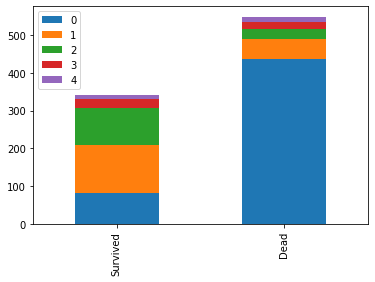

In [ ]:
survived = train[train['Survived'] == 1]['Prefix'].value_counts()
dead = train[train['Survived'] == 0]['Prefix'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True)

# 0, 1 생존자가 많음을 알 수 있음

In [ ]:
# 호칭들과 나이가 상관관계가 있을 것으로 예상, 그래서 Age의 결측치를 각 Prefix의 Age의 평균으로 대치해줌
for dataset in whole:
    dataset['Age'].fillna(union.groupby('Prefix')["Age"].transform("mean"), inplace = True)

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Prefix        0
dtype: int64

In [ ]:
# 3. 구간화 binning 
# 분위수에 따라 (0~22세 / 23~29세 / 30~35세 / 36 이상)

for dataset in whole:
    dataset['AgeCut'] = pd.qcut(dataset['Age'], 4, labels=[0,1,2,3])
    dataset.drop('Age', axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,AgeCut
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,1,1,0,PC 17599,71.2833,C85,C,2,3
3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
4,1,1,1,1,0,113803,53.1000,C123,S,2,2
5,0,3,0,0,0,373450,8.0500,NaN,S,0,2


In [ ]:
# 4. Ticket은 티켓의 일변번호이므로 열 삭제
# 5. Cabin은 방 번호로, 생존 확률과 연관이 있을지도 모름, 그러나 결측치가 너무 많아 열 삭제

for dataset in whole:
    dataset.drop('Ticket', axis=1, inplace=True)
    dataset.drop('Cabin', axis=1, inplace=True)

In [ ]:
# 6. Fare 열의 값이 다른 컬럼들과 너무 달라서 Scaling 필요
# 6. Fare 열과 가장 관련 있는 Pclass별로 그룹을 나누어 결측치 대체

for dataset in whole:
    dataset["Fare"].fillna(union.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

    
for dataset in whole:
    dataset['FareCut'] = pd.qcut(dataset['Fare'], 4, labels=[0,1,2,3])
    dataset.drop('Fare', axis=1, inplace=True)

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
Prefix      0
AgeCut      0
FareCut     0
dtype: int64

In [ ]:
# value_counts()를 통해 해당 열('embarked')의 최빈값 확인하기
# 결측치를 해당열의 최빈값으로 대치
print(train['Embarked'].value_counts())
train['Embarked'] = train['Embarked'].fillna('S')

embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}

for dataset in whole:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Prefix      0
AgeCut      0
FareCut     0
dtype: int64

In [ ]:
"""
predict = ml.predict(test.drop(['PassengerId', 'Age', 'Parch', 'Fare', 'SibSp'], axis=1))
result =pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predict
})
result.to_csv('result.csv', index=False) 
"""

"\npredict = ml.predict(test.drop(['PassengerId', 'Age', 'Parch', 'Fare', 'SibSp'], axis=1))\nresult =pd.DataFrame({\n    'PassengerId': test['PassengerId'],\n    'Survived': predict\n})\nresult.to_csv('result.csv', index=False) \n"